<h1>  Linear Support Vector Classifier </h1>
<p> We are using Linear SVC Model to predict the Shark Attacks.The main objective of this model is to learn when sharks will attack and factors that might influence those shark attacks.</p>



<p>The first step is to import all the libraries like scikit-learn,pandas etc. that are required to build the model</p> 

In [34]:
#import all the required packages
import pandas as pd
from matplotlib import style
from sklearn.model_selection import train_test_split
style.use('ggplot')
#import support vector machine from scikit-learn library 
from sklearn import svm
import matplotlib.pyplot as plt

<p>The next step is to read the CSV file and print the first five rows to ensure that we have read the CSV file correctly. </p>

In [35]:
#read the csv file using pandas library 
df= pd.read_csv("/Users/saikrishna/Downloads/Shark.csv", error_bad_lines=False, sep='\t')
#print the head of the dataframe
print(df.head())

   X.2  X.1  X  Id     Date  ID  TurtleExactCountSC turtleexactdiscretizeSC  \
0    1    1  1   4   5/4/09  25                 0.0                     Low   
1    2    2  2   5   5/5/09  33                 0.0                     Low   
2    3    3  3   7   5/7/09  49                 1.0                     Low   
3    4    4  4   8   5/8/09  57                 0.0                     Low   
4    5    5  5  11  5/11/09  81                 2.0                     Low   

   TurtleExactCountNC  TurtleExactCombined       ...        \
0                 0.0                    0       ...         
1                 0.0                    0       ...         
2                 0.0                    0       ...         
3                 0.0                    0       ...         
4                 0.0                    1       ...         

  StationPressure_minmax  WindSpeed_minmax Salinity_minmax Turbidity_minmax  \
0               0.578947          0.333333        0.636021         0.0325

<h3>Exploratory Data Analysis</h3>
<p> The next step is to analyze the data sets which is often done with visual methods. This step is mainly useful in realizing the factors that might have an impact on the 'Attack' column.</p>
<p>Initially , we are generating a boxplot of salinity vs Attack.</p>

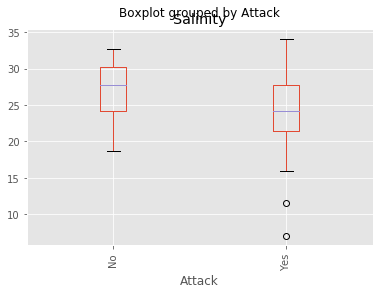

In [36]:
#boxplot to identify the relationship between the Attack and Salinity
df.boxplot(column='Salinity', by='Attack', rot=90)
#display the plot
plt.show()

<p> We are generating Scatter plot which was plotted WindSpeedMod against  TurbidityMod. </p> 

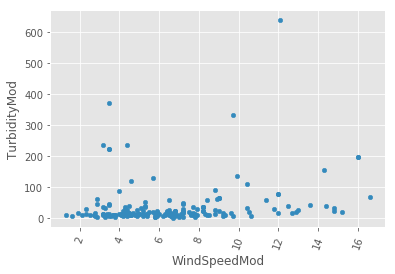

In [37]:
#Scatter plot 
df.plot(kind='scatter', x='WindSpeedMod', y='TurbidityMod', rot=70)
#Display the plot
plt.show()

<p> The next boxplot was plotted with Salinity against Attack. </p> 

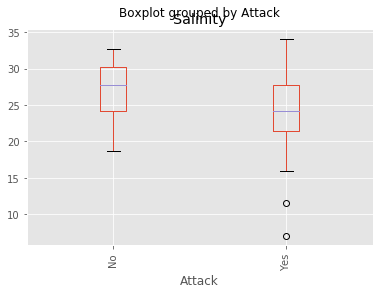

In [38]:
#boxplot 
df.boxplot(column='Salinity', by='Attack', rot=90)
#Display the plot
plt.show()

<p>The next step is to delete the columns that are redundant and do not have much influence on the 'Attack' Column in our dataset. </p>

In [8]:
#dropping the columns that are redundant and not necessary
df.drop(['X.2', 'X.1','X','Location','Beach','County'],1, inplace=True,errors='ignore')
#print(df.head())
#print the shape of data frame to get an idea about the data frame
print(df.shape)

(186, 66)


In [31]:
df.fillna(0, inplace=True)
#since we are predicting whether an attack has happened or not, target column will be the Attack
columns_target=['Attack']

columns_train=['Precipitation_Value','StationPressure','WindSpeed','Salinity','Turbidity','Temperature','DissovedO2']
X=df[columns_train]
y=df[columns_target]
#printing the shape of y
print(y.shape)
#printing the shape of X
print(X.shape)

(186, 1)
(186, 7)


<p> The Final step is to split the data set and apply the Linear SVC model on our data set. </p>

In [16]:
#LINEAR SVC
#splitting the data set into training data and testing data with typical ratio of 80 to 20
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
clf = svm.LinearSVC()
#fitting the data to the model
#making use of ravel()
clf.fit(X_train, y_train.values.ravel())
print(clf)
#predicting for Attack
print(clf.predict(X_test[0:186]))
#calculating the accuracy for the prediction
print(clf.score(X_test,y_test))

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
['No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes'
 'No' 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'No']
0.657894736842



<h4> Citations : </h4>

<p>http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html </p>
<p>https://stackoverflow.com</p>
<p>https://github.com/AKDDResearch/Shark-Attack</p>
 
Hands-On Machine Learning with Scikit-Learn and TensorFlow.